# Kerasを用いた画像分類入門

## ハンズオン テンプレート

## Google Colab用の設定

Google Colaboratory で実行する場合には下記のセルを実行してください。

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!unzip /content/gdrive/My\ Drive/GD_share01/noodles.zip -d /content

## ローカルPC用の設定

各自のPCでJupyter Notebookを起動して実行する場合には、以下のセルを実行してください。
また、別途noodles.zipを解凍しておいてください。

In [2]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install keras
!pip install pillow

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## ライブラリのインポート

In [1]:
import keras
## import tensorflow.keras as keras  #　こちらでもOK

Using TensorFlow backend.


## 画像データの準備

下記のプログラムで、テスト用データのジェネレータのプログラムを完成させてください。

In [4]:
train_dir = './noodles/train/'
validation_dir = './noodles/validaiton/'
test_dir = './noodles/test/'
image_size = (128, 128)
batch_size = 32
steps_per_epoch = 300 // batch_size
validation_steps = 100 // batch_size
test_steps = 100 // batch_size

# 学習がはやく収束するように1/255にしている
image_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_generator = image_data_generator.flow_from_directory(
    train_dir,
    target_size=image_size, 
    batch_size=batch_size
)
validation_generator = image_data_generator.flow_from_directory(
    validation_dir,
    target_size=image_size, 
    batch_size=batch_size
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### 問題1.

以下のtest_generatorを、完成させなさい。

In [9]:
test_generator = image_data_generator.flow_from_directory(
    test_dir,
    target_size=image_size, 
    batch_size=batch_size

)

Found 200 images belonging to 2 classes.


## モデルの構築

全結合層「Dense」を使って、多層のニューラルネットワークを完成させましょう。

### 問題2.

以下の途中にある`model.add()`の引数を書いてください。

In [11]:
model = keras.models.Sequential()

# 平滑化
model.add(keras.layers.Flatten(input_shape=(128,128,3)))
#　全結合層
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))    ## このmodel.add()の引数を書いてください
model.add(keras.layers.Dense(2, activation='softmax'))

## モデル構造の表示

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               6291584   
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 258       
Total params: 6,308,354
Trainable params: 6,308,354
Non-trainable params: 0
_________________________________________________________________


## モデルのコンパイル

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

## モデルの訓練

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
4/9 [============>.................] - ETA: 7s - loss: 5.8732 - acc: 0.4688

c:\users\nakamura\python-ml-env\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


9/9 [==============================] - 12s 1s/step - loss: 6.9197 - acc: 0.4965 - val_loss: 8.2269 - val_acc: 0.4896
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 8.1710 - acc: 0.4931 - val_loss: 7.8912 - val_acc: 0.5104
Epoch 3/10
9/9 [==============================] - 9s 971ms/step - loss: 7.5371 - acc: 0.5324 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 4/10
9/9 [==============================] - 8s 857ms/step - loss: 8.3948 - acc: 0.4792 - val_loss: 8.3948 - val_acc: 0.4792
Epoch 5/10
9/9 [==============================] - 8s 943ms/step - loss: 7.9578 - acc: 0.5063 - val_loss: 8.7306 - val_acc: 0.4583
Epoch 6/10
9/9 [==============================] - 8s 856ms/step - loss: 8.1150 - acc: 0.4965 - val_loss: 6.3801 - val_acc: 0.6042
Epoch 7/10
9/9 [==============================] - 9s 1s/step - loss: 8.1881 - acc: 0.4920 - val_loss: 10.0738 - val_acc: 0.3750
Epoch 8/10
9/9 [==============================] - 7s 826ms/step - loss: 7.5554 - acc: 0.5312 - val_loss: 8.

## 学習経過のグラフ化

下記のプログラムで、エポックごとの損失と正解率をグラフ化できます。
グラフから何が読み取れるでしょうか？

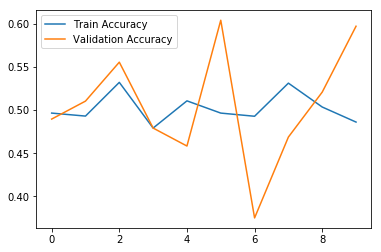

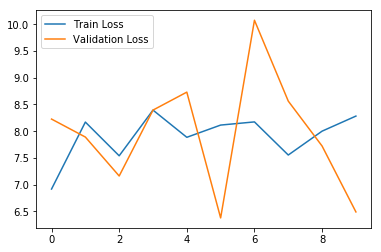

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

## モデルの評価

In [16]:
evaluation = model.evaluate_generator(test_generator, steps=test_steps)
print(evaluation)   # [loss, accuracy] が表示される

c:\users\nakamura\python-ml-env\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


[8.730635007222494, 0.4583333333333333]


## モデルの保存

In [17]:
model.save('noodle_model.h5')

## 保存済みモデルの読み込み

In [18]:
model = keras.models.load_model('noodle_model.h5')

## モデルによる予測

下記のプログラムで、学習したモデルを使ってテスト用データの分類（予測）を行うことができます。
予測結果がどのような形式なのかを確認してください。

In [19]:
predictions = model.predict_generator(test_generator, steps=test_steps)

print(predictions)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## モデルの予測結果を見てみる

次のプログラムを実行すると、テスト用データの１バッチ分についてモデルの予測値と正解を画像つきで確認できます。
どのような結果になったかを確認してください。

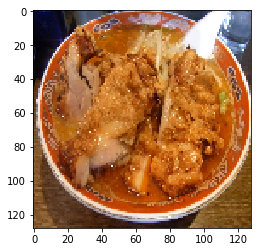

推定： うどん
正解： ラーメン


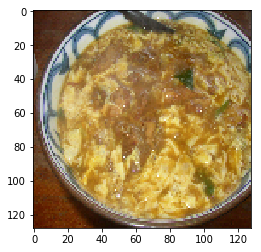

推定： うどん
正解： うどん


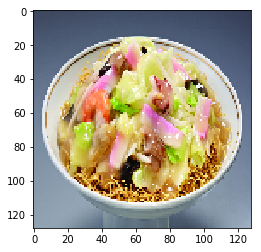

推定： うどん
正解： うどん


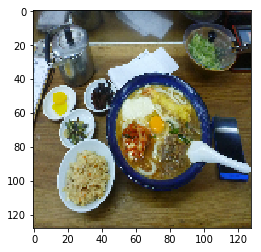

推定： うどん
正解： うどん


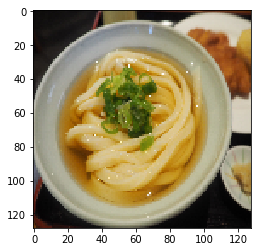

推定： うどん
正解： うどん


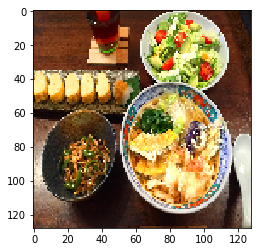

推定： うどん
正解： うどん


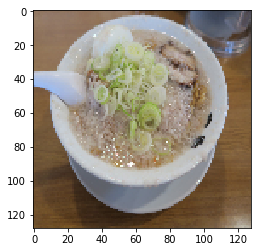

推定： うどん
正解： ラーメン


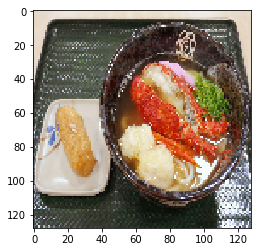

推定： うどん
正解： うどん


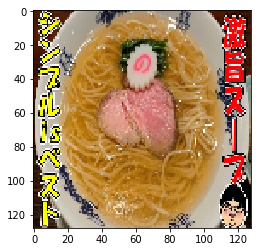

推定： うどん
正解： ラーメン


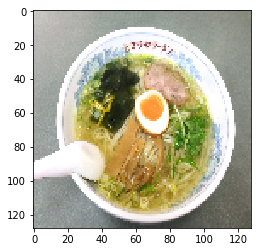

推定： うどん
正解： ラーメン


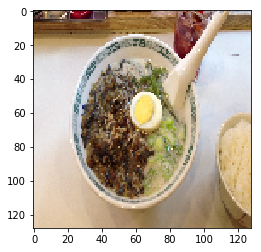

推定： うどん
正解： ラーメン


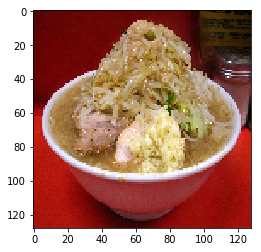

推定： うどん
正解： ラーメン


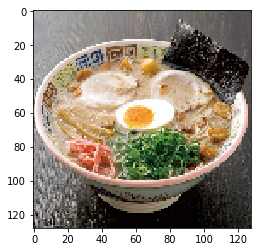

推定： うどん
正解： ラーメン


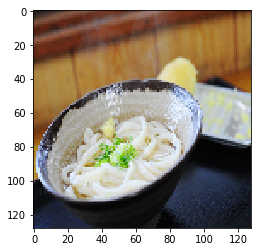

推定： うどん
正解： うどん


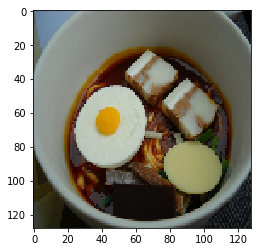

推定： うどん
正解： ラーメン


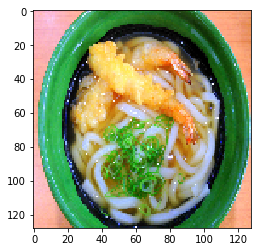

推定： うどん
正解： うどん


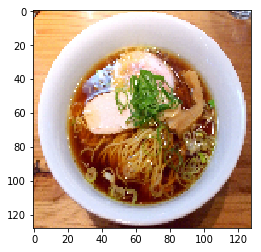

推定： うどん
正解： ラーメン


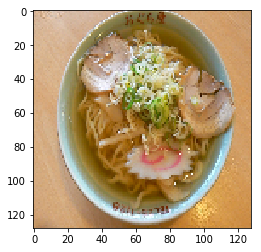

推定： うどん
正解： ラーメン


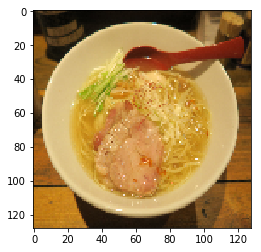

推定： うどん
正解： ラーメン


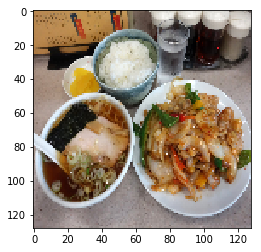

推定： うどん
正解： ラーメン


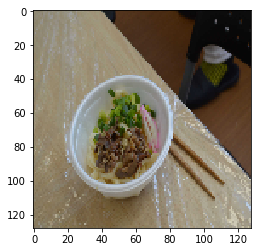

推定： うどん
正解： うどん


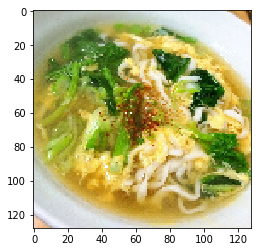

推定： うどん
正解： うどん


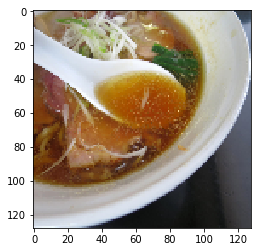

推定： うどん
正解： ラーメン


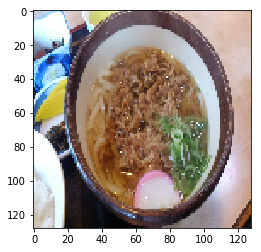

推定： うどん
正解： うどん


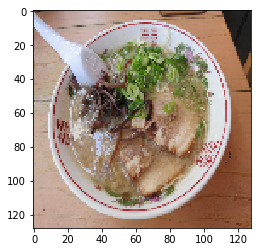

推定： うどん
正解： ラーメン


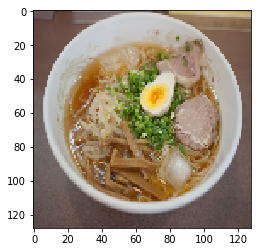

推定： うどん
正解： ラーメン


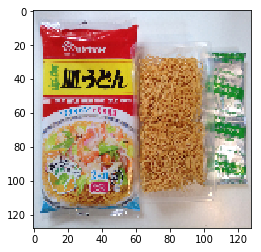

推定： うどん
正解： うどん


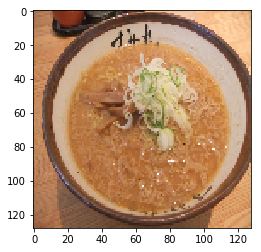

推定： うどん
正解： ラーメン


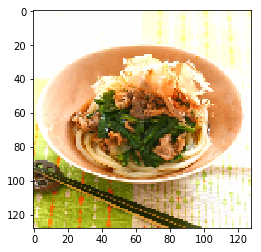

推定： うどん
正解： うどん


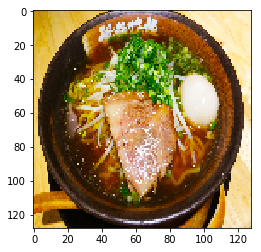

推定： うどん
正解： ラーメン


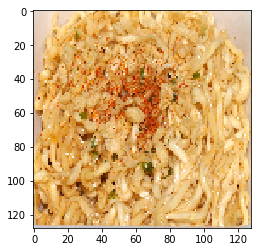

推定： うどん
正解： うどん


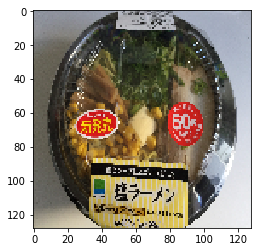

推定： うどん
正解： ラーメン


In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

code_to_class = {0: 'ラーメン', 1: 'うどん'}

x, y = next(test_generator)
y_true = np.argmax(y, axis=1)
y_prob = model.predict_on_batch(x)
y_pred = np.argmax(y_prob, axis=1)

for i in range(len(x)):
    plt.imshow(x[i])
    plt.show()
    print('推定：', code_to_class[y_pred[i]])
    print('正解：', code_to_class[y_true[i]])